In [1]:
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

<ipython-input-1-9a991ae046d0>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
series = read_csv('New Dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.index = series.index.to_period('Y')

In [3]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

C:\Users\Rathinaraja Jeyaraj\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Rathinaraja Jeyaraj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [4]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          AS Neighbours   No. Observations:                    3
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -10.661
Date:                Thu, 04 Nov 2021   AIC                             33.321
Time:                        22:47:31   BIC                             25.480
Sample:                    12-31-2019   HQIC                            16.923
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9378     33.144      0.058      0.953     -63.023      66.898
ar.L2         -0.9971     19.017     -0.052      0.958     -38.269      36.275
ar.L3         -0.0024      1.919     -0.001      0.9

C:\Users\Rathinaraja Jeyaraj\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3098: UserWarning: Early subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  warnings.warn('Early subset of data for variable %d'
C:\Users\Rathinaraja Jeyaraj\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3103: UserWarning: Later subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  warnings.warn('Later subset of data for variable %d'


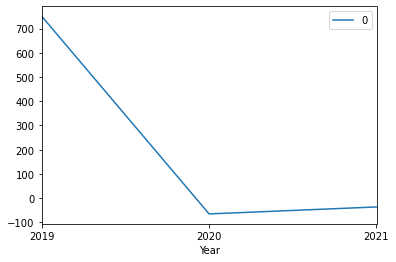

In [5]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

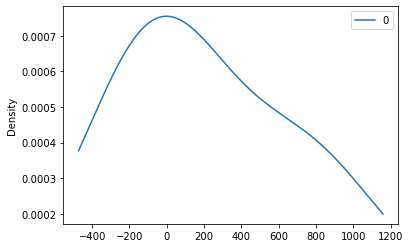

In [6]:
residuals.plot(kind='kde')
pyplot.show()

In [7]:
print(residuals.describe())

                0
count    3.000000
mean   216.467724
std    463.142065
min    -65.186133
25%    -50.798414
50%    -36.410695
75%    357.294652
max    751.000000


In [13]:
model_fit.predict(2024)

4043    471.303901
Freq: A-DEC, dtype: float64